In [1]:
pip install pyodbc pandas sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip setuptools wheel


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------- ----------------- 1.0/1.8 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------------------------------- ------ 1.0/1.2 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 79.0.1
    Uninstalling setuptools-79.0.1:
      Successfully uninstalled setuptools-79.0.1
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sqlalchemy import create_engine
import pandas as pd
import urllib

# 🔹 Paramètres de connexion
server = 'DESKTOP-5NNTSUS'  # Nom du serveur SQL Server
database = 'sa_pi'  # Nom de la base de données

# 🔹 Construction de l'URI avec encodage des paramètres
params = urllib.parse.quote_plus(
    f"DRIVER=ODBC Driver 17 for SQL Server;"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"
)

# 🔹 Création du moteur SQLAlchemy
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# 🔹 Exécution de la requête SQL
query = "SELECT * FROM kpi_prix"  # Remplace 'YourTable' par le vrai nom de ta table
df = pd.read_sql(query, engine)

# 🔹 Affichage des premières lignes
print(df.head())

# 🔹 Exportation des données en CSV (optionnel)
df.to_csv("exported_data.csv", index=False)
print("✅ Données exportées avec succès !")
df.shape

   annne        actif  amorsitesment  mainteanance       revenue  \
0   2000  201336944.0     4026738.75     5255891.0  5.534759e+09   
1   2002  213938208.0    12836292.00     8940646.0  5.784253e+09   
2   2004  239817408.0    23981740.00     8975540.0  5.955701e+09   
3   2006  234704336.0    32858608.00    10002466.0  5.591025e+09   
4   2008  226009008.0    40681620.00    11903295.0  6.234153e+09   

   investisement  
0    182826320.0  
1    264511408.0  
2    293709792.0  
3    171836192.0  
4    291259488.0  
✅ Données exportées avec succès !


(25, 6)

In [4]:
print(df.columns)


Index(['annne', 'actif', 'amorsitesment', 'mainteanance', 'revenue',
       'investisement'],
      dtype='object')


In [5]:
print(df.head())

   annne        actif  amorsitesment  mainteanance       revenue  \
0   2000  201336944.0     4026738.75     5255891.0  5.534759e+09   
1   2002  213938208.0    12836292.00     8940646.0  5.784253e+09   
2   2004  239817408.0    23981740.00     8975540.0  5.955701e+09   
3   2006  234704336.0    32858608.00    10002466.0  5.591025e+09   
4   2008  226009008.0    40681620.00    11903295.0  6.234153e+09   

   investisement  
0    182826320.0  
1    264511408.0  
2    293709792.0  
3    171836192.0  
4    291259488.0  


In [6]:
 df_sorted = df.sort_values(by='annne')

In [7]:
print (df_sorted )

    annne        actif  amorsitesment  mainteanance       revenue  \
0    2000  201336944.0   4.026739e+06     5255891.0  5.534759e+09   
13   2001  209086832.0   8.363473e+06    10225318.0  5.525097e+09   
1    2002  213938208.0   1.283629e+07     8940646.0  5.784253e+09   
14   2003  214174144.0   1.713393e+07    12949347.0  5.783704e+09   
2    2004  239817408.0   2.398174e+07     8975540.0  5.955701e+09   
15   2005  252229792.0   3.026758e+07    11960524.0  5.695625e+09   
3    2006  234704336.0   3.285861e+07    10002466.0  5.591025e+09   
16   2007  238207616.0   3.811322e+07    12273959.0  5.664295e+09   
4    2008  226009008.0   4.068162e+07    11903295.0  6.234153e+09   
17   2009  251403056.0   5.028061e+07     5533505.0  6.119756e+09   
5    2010  208255040.0   4.581611e+07    14570461.0  5.942994e+09   
18   2011  296441152.0   7.114587e+07     9585484.0  6.517235e+09   
6    2012  201272624.0   5.233088e+07    14785638.0  6.181487e+09   
19   2013  211141376.0   5.911958e

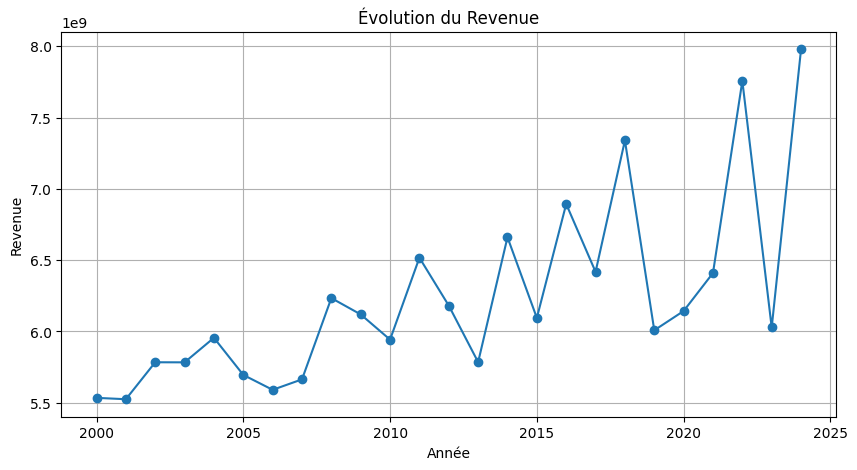

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_sorted['annne'], df_sorted['revenue'], marker='o')
plt.title("Évolution du Revenue")
plt.xlabel("Année")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


In [9]:
print(df_sorted.index)


Index([ 0, 13,  1, 14,  2, 15,  3, 16,  4, 17,  5, 18,  6, 19,  7, 20,  8, 21,
        9, 22, 10, 23, 11, 24, 12],
      dtype='int64')


In [10]:
from statsmodels.tsa.stattools import adfuller

# 🔹 Test de stationnarité
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'Statistique ADF: {result[0]}')
    print(f'P-value: {result[1]}')
    if result[1] <= 0.05:
        print("✅ La série est stationnaire.")
    else:
        print("⚠️ La série n'est pas stationnaire.")

test_stationarity(df_sorted['revenue'])

Statistique ADF: -0.3929697289116934
P-value: 0.9112659800564987
⚠️ La série n'est pas stationnaire.


In [11]:
import numpy as np

df_sorted['log_revenue'] = np.log(df_sorted['revenue'])
df_sorted['log_revenue_diff'] = df_sorted['log_revenue'].diff()
df_sorted.dropna(subset=['log_revenue_diff'], inplace=True)
test_stationarity(df_sorted['log_revenue_diff'])


Statistique ADF: -5.062619760068614
P-value: 1.6659489943112483e-05
✅ La série est stationnaire.


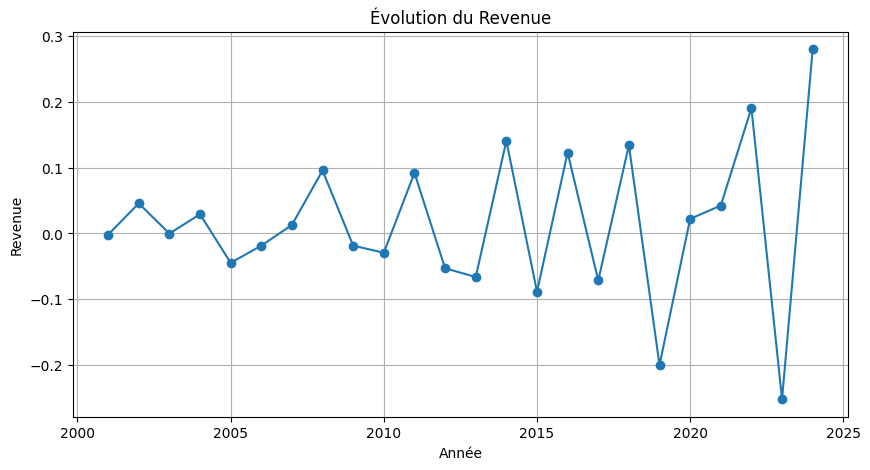

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_sorted['annne'], df_sorted['log_revenue_diff'], marker='o')
plt.title("Évolution du Revenue")
plt.xlabel("Année")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packag

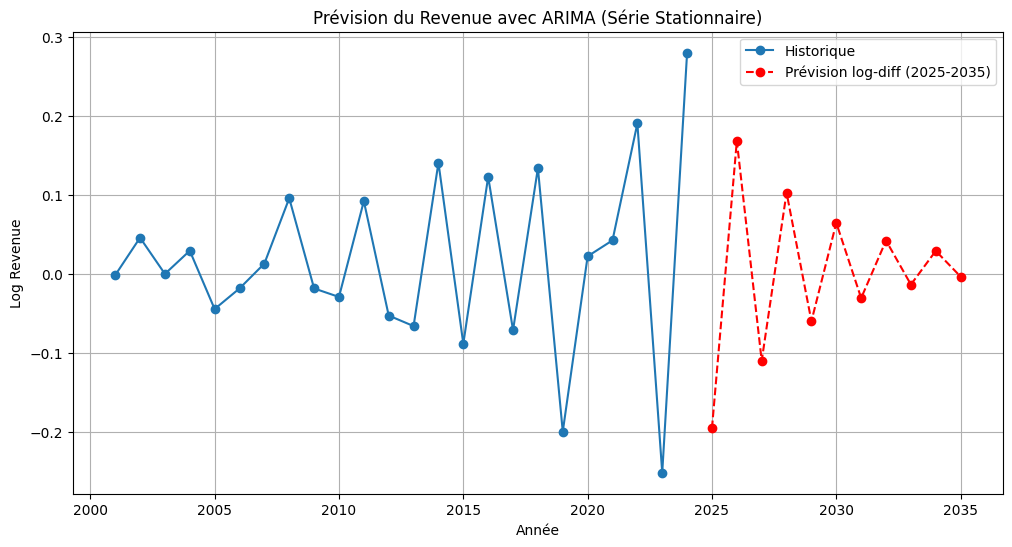

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Construction du modèle ARIMA sur la série stationnaire (log transformée et différenciée)
model = ARIMA(df_sorted['log_revenue_diff'], order=(1, 1, 1))  # (p, d, q) = (1, 1, 1)
model_fit = model.fit()

# 🔹 Prévision pour les 11 prochaines années (2025 à 2035) sur la série stationnaire
forecast_steps = 11
forecast_result = model_fit.get_forecast(steps=forecast_steps)

# 🔹 Obtenir les prédictions log transformées
forecast_log = forecast_result.predicted_mean

# 🔹 Visualisation des prévisions sur la série stationnaire
plt.figure(figsize=(12, 6))

# 🔹 Affichage de l'historique des données
#  df_sorted['revenue'] correct
plt.plot(df_sorted['annne'], df_sorted['log_revenue_diff'], label='Historique', marker='o')

# 🔹 Affichage des prévisions (log-diff)
plt.plot(range(df_sorted['annne'].iloc[-1] + 1, df_sorted['annne'].iloc[-1] + forecast_steps + 1), forecast_log, 
         label='Prévision log-diff (2025-2035)', marker='o', linestyle='--', color='red')

plt.title("Prévision du Revenue avec ARIMA (Série Stationnaire)")
plt.xlabel("Année")
plt.ylabel("Log Revenue")
plt.grid(True)
plt.legend()
plt.show()


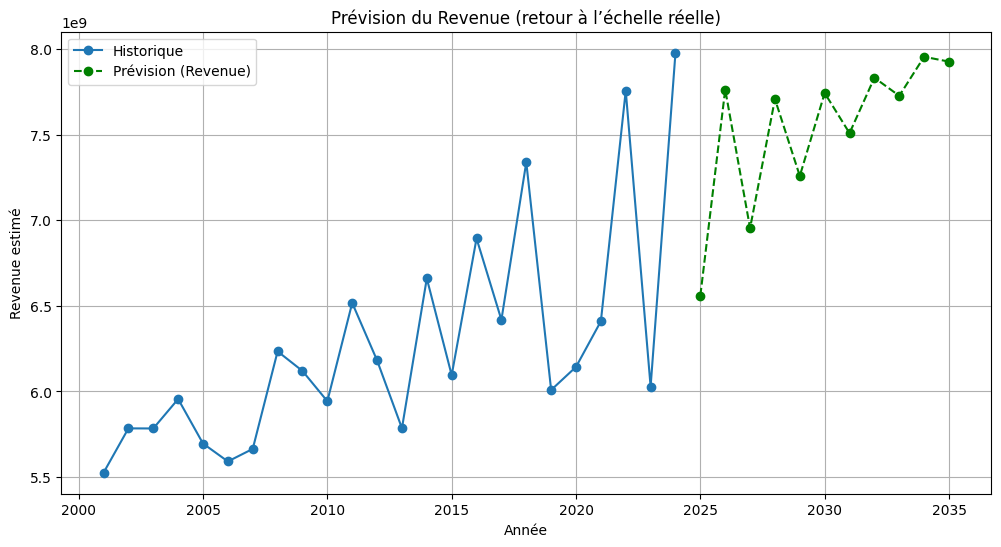

In [19]:
# 🔹 Reprendre la dernière valeur connue de log_revenue
last_log_value = df_sorted['log_revenue'].iloc[-1]

# 🔹 Reconstituer les valeurs cumulées de log_revenue prédites
forecast_log_revenue = forecast_log.cumsum() + last_log_value

# 🔹 Revenir au revenu original en exponentiant
forecast_revenue = np.exp(forecast_log_revenue)

# 🔹 Créer les années futures
future_years = np.arange(df_sorted['annne'].iloc[-1] + 1, df_sorted['annne'].iloc[-1] + forecast_steps + 1)

# 🔹 Visualisation complète
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['annne'], df_sorted['revenue'], label='Historique', marker='o')
plt.plot(future_years, forecast_revenue, label='Prévision (Revenue)', marker='o', linestyle='--', color='green')
plt.title("Prévision du Revenue (retour à l’échelle réelle)")
plt.xlabel("Année")
plt.ylabel("Revenue estimé")
plt.grid(True)
plt.legend()
plt.show()


In [20]:
# 🔹 Créer un DataFrame avec les prévisions finales
df_forecast = pd.DataFrame({
    'annee': future_years,
    'revenue_prevu': forecast_revenue
})

# 🔹 Afficher le DataFrame
print("📈 Prévisions du revenu (revenu réel estimé) :")
print(df_forecast)


📈 Prévisions du revenu (revenu réel estimé) :
    annee  revenue_prevu
24   2025   6.560361e+09
25   2026   7.764192e+09
26   2027   6.954232e+09
27   2028   7.708491e+09
28   2029   7.259103e+09
29   2030   7.743869e+09
30   2031   7.509375e+09
31   2032   7.833208e+09
32   2033   7.727432e+09
33   2034   7.955594e+09
34   2035   7.927330e+09


In [22]:
# Sauvegarder le modèle avec joblib
import joblib

joblib.dump(model, 'SerieRevenueARIMA.pkl')

['SerieRevenueARIMA.pkl']